In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
%%capture
import sys
sys.path.insert(0, '/home/raf_pc/Kemal/RiboSeqAnalysis')
from infrastructure.main import *

temp_repo_dir = "/home/raf_pc/Kemal/Temp/mouse"
data_repo_dir = "/home/raf_pc/Kemal/Data/sam_arpat"
script_path_infrastructure = "/home/raf_pc/Kemal/RiboSeqAnalysis/infrastructure/"

disomes = [os.path.join(data_repo_dir, i) for i in ["SRR9715828.sam", "SRR9715826.sam"]]
monosomes = [os.path.join(data_repo_dir, i) for i in ["SRR1930189.sam", "SRR1930188.sam"]]


I = Infrastructre(temp_repo_dir,
                  riboseq_assign_at=-15,
                  riboseq_assign_to="best_transcript",
                  ensembl_release=102,
                  organism="mus_musculus",
                  include_gene3d=True,
                  verbose=True)

I.riboseq_sixtymers = RiboSeqSixtymers(I.temp_repo_dir, monosomes, disomes, "sixtymers",
                                       I.riboseq_assign_at, I.riboseq_assign_to,
                                       I.protein_genome, I.gene_info,
                                       exclude_genes=I.exclude_genes, verbose=I.verbose,
                                       footprint_len_experiment=list(range(45,71)),  # From paper
                                       footprint_len_translatome=list(range(26,36))  # From paper
                                       )

In [9]:
the_range = list(range(18,80))
trieal = I.riboseq_sixtymers.translatome.assign_for_defined_footprint_lengths(the_range, 32, 
                                                                              I.protein_genome, I.gene_info)

In [24]:
I.riboseq_sixtymers.translatome

In [10]:
ls = list()
for w in the_range:
    counter = 0
    for gene_id in trieal[30].keys():
        counter += np.sum(trieal[w][gene_id])
    ls.append(counter)

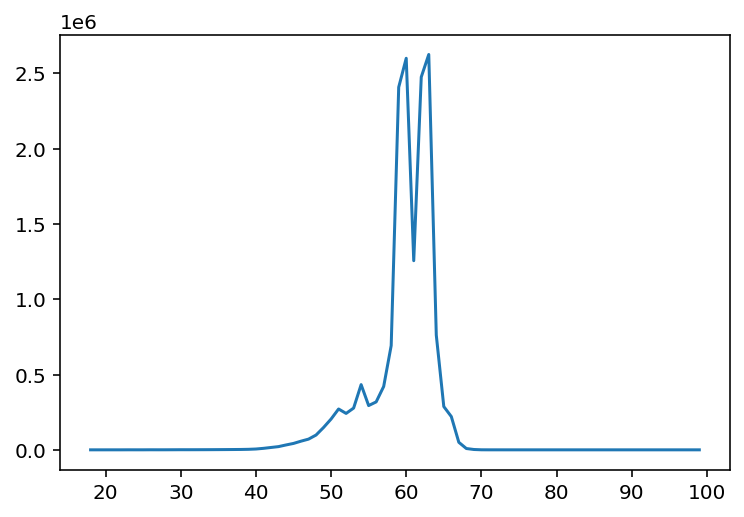

63

In [11]:
plt.plot(the_range, ls); plt.show()
ls.index(max(ls)) + min(the_range)

In [ ]:
gene_id = I.gene_list[5]
print(np.sum(I.riboseq_sixtymers.translatome.gene_assignments[gene_id]))
k = np.array([np.sum(trieal[i][gene_id]) for i in the_range])
print(np.sum(k))
plt.plot(the_range, k); plt.show()

In [ ]:
the_range = list(range(10,60))

In [ ]:
z = 63

y = max(I.riboseq_sixtymers.experiment.gene_lengths.values())
x = len(trieal[z])
arr60 = np.zeros((x,y))
for ind, gene_id in enumerate(trieal[z].keys()):
    sum_of_replicates = np.sum(trieal[z][gene_id], axis=0)[::-1]
    arr60[ind, 0:len(sum_of_replicates)] = sum_of_replicates
for mm in range(3):
    print(np.sum([num for ind, num in enumerate(np.sum(arr60, axis=0)) if ind % 3 == mm]))